Name: Saurabh nale 
Email: saurabhnale9@gmail.com
FSM topic 2 

In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import math

In [121]:
df = pd.read_csv("Medical Price Dataset.csv")

In [122]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
df.shape[0]

1338

Checking for null values

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [125]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


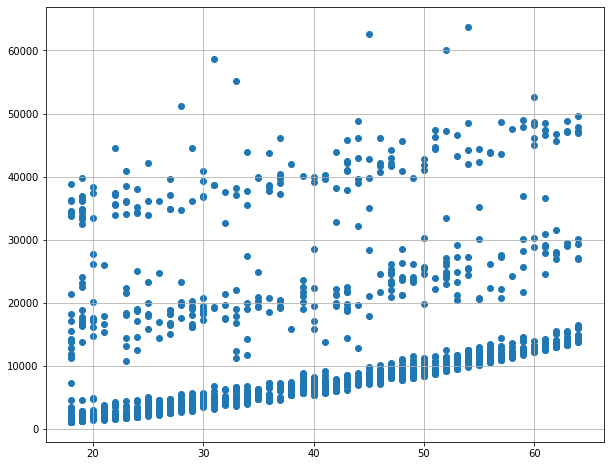

In [126]:
plt.figure(figsize=(10,8))
plt.scatter(df['age'],df['charges'])
plt.grid()
plt.show()

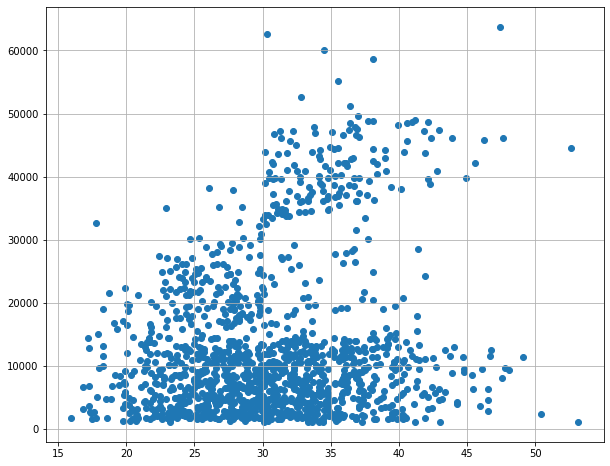

In [127]:
plt.figure(figsize=(10,8))
plt.scatter(df['bmi'],df['charges'])
plt.grid()
plt.show()

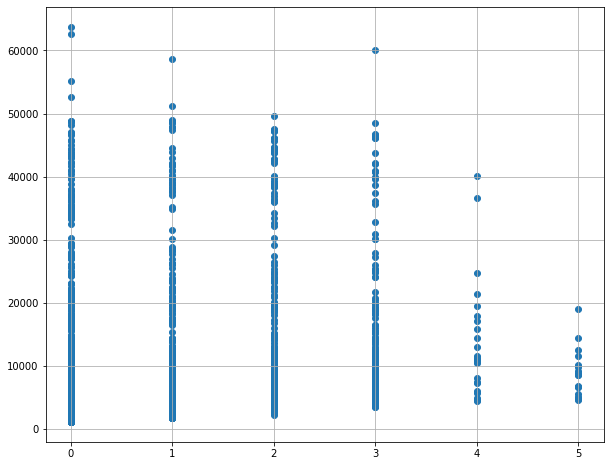

In [128]:
plt.figure(figsize=(10,8))
plt.scatter(df['children'],df['charges'])
plt.grid()
plt.show()

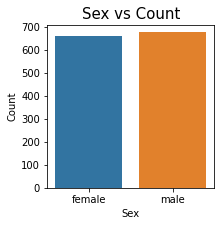

In [129]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'sex', data = df)
plt.xticks( fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Sex vs Count",fontsize=15)
plt.show()

<AxesSubplot: >

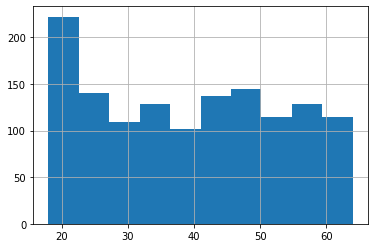

In [130]:
df['age'].hist()

<AxesSubplot: >

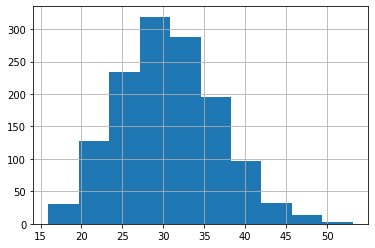

In [131]:
df['bmi'].hist()

<AxesSubplot: >

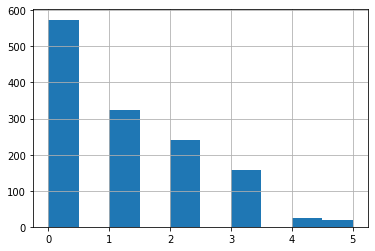

In [132]:
df['children'].hist()

In [133]:
df = pd.get_dummies(df, columns = ['sex', 'smoker','region'])

In [134]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [135]:
def split_data(df):
    length = df.shape[0]
    first =  int(length*0.8)
    subset1 = df[:first]
    subset2 = df[first:]
    X_train = subset1.drop([subset1.columns[3]], axis = 1).values
    y_train = subset1[subset1.columns[3]].values
    X_test = subset2.drop([subset2.columns[3]], axis = 1).values
    y_test = subset2[subset2.columns[3]].values
    return X_train ,y_train, X_test, y_test



In [136]:
X_train ,y_train, X_test, y_test = split_data(df)

In [137]:
def cost_function(X, Y):
    beta = np.dot ( ( np.linalg.inv( np.dot( X.T, X ) ) ), np.dot( X.T, Y ) )

    return beta

In [138]:
def predict(X_test, beta):
    return np.dot(X_test, beta)

In [139]:
beta = cost_function(X_train, y_train)
predictions = predict(X_test, beta)

print(predictions.shape)

(268,)


In [140]:
def metrix(predictions, Y_test):

    MAE = np.mean(np.abs(predictions-Y_test))

    MSE = np.square(np.subtract(Y_test,predictions)).mean() 
    RMSE = math.sqrt(MSE)

    rss = np.sum(np.square((Y_test- predictions)))
    mean = np.mean(Y_test)
    sst = np.sum(np.square(Y_test-mean))
    r_square = 1 - (rss/sst)
    
    return MAE, RMSE, r_square

In [141]:
mae, rmse, r_square = metrix(predictions, y_test)
print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)
print("R square: ", r_square)

Mean Absolute Error:  46650.02066676495
Root Mean Square Error:  58393.600759690584
R square:  -21.152004775727086
